<a href="https://colab.research.google.com/github/hafilmr/LearningCodeTrainee/blob/main/ARIMA/ARIMA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AUTO ARIMA, BUT WITH STOCKS DATA

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

File ‘sp500sub.csv’ already there; not retrieving.



### Install Library `pmdarima` for AUTO ARIMA

In [ ]:
!pip install pmdarima

In [ ]:
# Import Library
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [ ]:
goog = df[df['Name'] == 'GOOG'][['Close']]
goog.head()

,Close
Date,
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
2010-01-08,299.885956


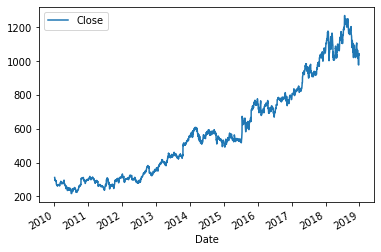

In [ ]:
goog.plot();

In [ ]:
# goog['LogClose'] = np.log(goog['Close'])
# goog.head()

In [ ]:
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [ ]:
model = pm.auto_arima(train,
                      error_action='ignore',
                      trace=True,
                      suppress_warnings=True,
                      maxiter=10, #The maximum number of function evaluations
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16270.771, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16268.077, Time=0.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.935, Time=0.81 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16268.277, Time=0.83 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=1.38 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16264.983, Time=1.17 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=16266.925, Time=1.80 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16268.907, Time=2.56 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=16265.470, Time=0.43 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 11.537 seconds


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8127.491
Date:                Fri, 04 Feb 2022   AIC                          16264.983
Time:                        09:57:50   BIC                          16293.536
Sample:                             0   HQIC                         16275.409
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3104      0.198      1.571      0.116      -0.077       0.698
ar.L1          0.0378      0.012      3.152      0.002       0.014       0.061
ar.L2         -0.0410      0.013     -3.241      0.001      -0.066      -0.016
ar.L3          0.0488      0.012      4.031      0.000       0.025       0.073
sigma2        85.1623      1.033     82.421      0.000      83.137      87.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11790.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.78   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (3, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [ ]:
def plot_result(model, fulldata, train, test):
  params = model.get_params()
  d = params['order'][1]

  train_pred = model.predict_in_sample(start=d, end=-1)
  test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

  fig, ax = plt.subplots(figsize=(10, 6))
  ax.plot(fulldata.index, fulldata, label='data')
  ax.plot(train.index[d:], train_pred, label='fitted')
  ax.plot(test.index, test_pred, label='forecast')
  ax.fill_between(test.index, \
                  confint[:, 0], confint[:, 1], \
                  color='red', alpha = 0.3)
  ax.legend();
  # ax.set(title='Stocks US with Auto Arima Models')

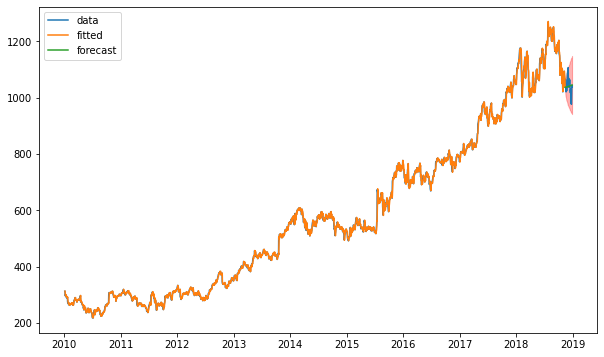

In [ ]:
plot_result(model, goog, train, test)

As you can see, the fitted model looks pretty good.

Of course, you shouldn't trust a plow like this because it's very small.

Unfortunately, it's too small to see whether or not our forecast is good, which is the part we actually care about.

In [ ]:
def plot_test(model, test):
  test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

  fig, ax = plt.subplots(figsize=(10, 6))
  ax.plot(test.index, test, label='true')
  ax.plot(test.index, test_pred, label='forecast')
  ax.fill_between(test.index, \
                  confint[:,0], confint[:,1], \
                  color='red', alpha = 0.3)
  ax.legend()
  # ax.set(title='Stocks US (Test) models with Auto ARIMA')

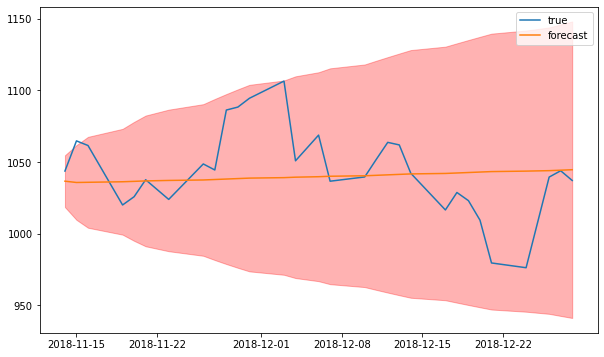

In [ ]:
plot_test(model, test)

our forecast is not actually that good.

Remember, this is over 30 trading days.

One nice thing about this is that it does seem to capture that average quite well.

In addition, the true price always seems to stay within the confidence bounds for the most part.

Of course, it's worth asking whether a model like this could actually predict what will happen over the next 30 trading days.

In [ ]:
def rmse(y, t):
  return np.sqrt(np.mean((t - y)**2))

In [ ]:
# print('RMSE ARIMA:', rmse(model.predict(Ntest), test))
print('RMSE NAIVE:', rmse(train.iloc[-1], test))

ValueError: ignored

In [ ]:
# print('RMSE ARIMA:', rmse(model.predict(Ntest), test))

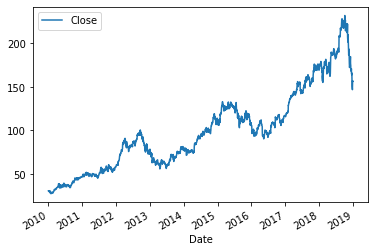

In [ ]:
aapl = df[df['Name'] == 'AAPL'][['Close']]
aapl.plot()

In [ ]:
train = aapl.iloc[:-Ntest]
test = aapl.iloc[-Ntest:]

In [ ]:
model = pm.auto_arima(train,
                       error_action='ignore', trace=True,
                       supress_warnings=True, maxiter=10,
                       seaonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8570.296, Time=2.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8575.329, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8574.709, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8574.392, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8577.622, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.650, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8571.332, Time=0.83 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8572.500, Time=1.00 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8572.527, Time=1.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8574.574, Time=0.62 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8570.852, Time=1.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8570.880, Time=1.03 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8579.289, Time=1.31 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=8572.973, Time=0.40 sec

Best model:  ARIMA(2,1,2)(0,0,0)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4279.148
Date:                Fri, 04 Feb 2022   AIC                           8570.296
Time:                        09:58:20   BIC                           8604.560
Sample:                             0   HQIC                          8582.808
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0803      0.042      1.896      0.058      -0.003       0.163
ar.L1          0.3755      0.165      2.279      0.023       0.053       0.699
ar.L2         -0.4239      0.176     -2.407      0.016      -0.769      -0.079
ma.L1         -0.3433      0.172     -2.002      0.045      -0.679      -0.007
ma.L2          0.3579      0.183      1.958      0.050      -0.000       0.716
sigma2         2.7182      0.039     69.453      0.000       2.642       2.795
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6223.04
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (2, 1, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

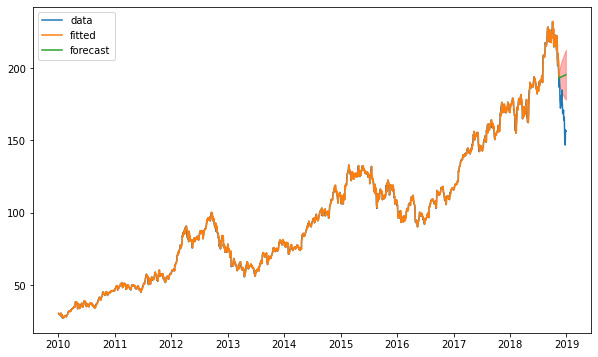

In [ ]:
plot_result(model, aapl, train, test)

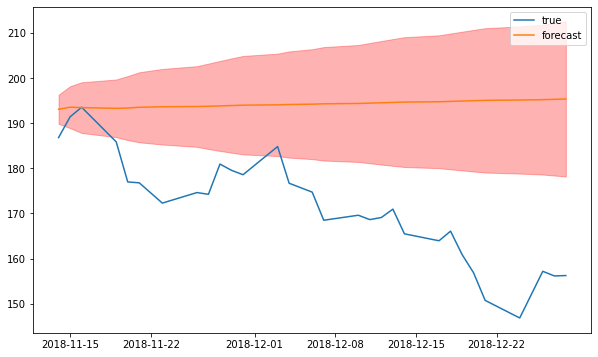

In [ ]:
plot_test(model, test)

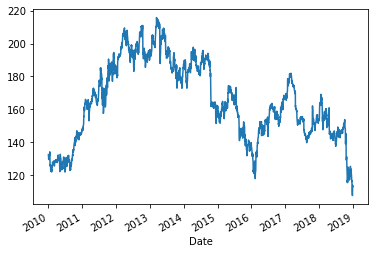

In [ ]:
ibm = df[df['Name'] == 'IBM']['Close']
ibm.plot()

In [ ]:
train = ibm.iloc[:-Ntest]
test = ibm.iloc[-Ntest:]

In [ ]:
model = pm.auto_arima(train,
                      error_action='ignore', trace=True,
                      supress_warnings=True, maxiter=10,
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9442.954, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9436.082, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9437.603, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9437.589, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9434.097, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9439.637, Time=0.64 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.298 seconds


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4716.049
Date:                Fri, 04 Feb 2022   AIC                           9434.097
Time:                        09:58:23   BIC                           9439.808
Sample:                             0   HQIC                          9436.183
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.0067      0.055     72.559      0.000       3.898       4.115
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):              5352.76
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.77
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

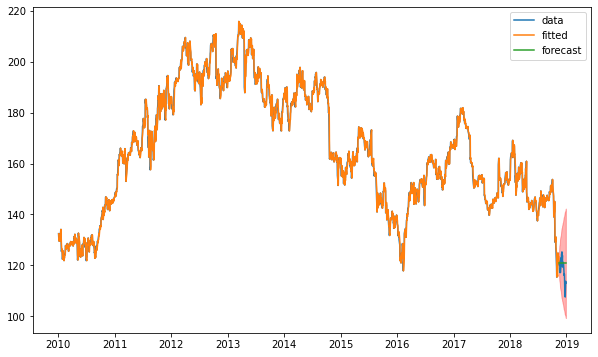

In [ ]:
plot_result(model, ibm, train, test)

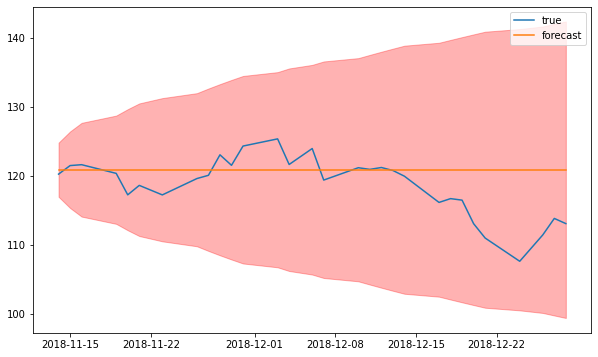

In [ ]:
plot_test(model, test)

In [ ]:
print('RMSE ARIMA:', rmse(model.predict(Ntest), test))
print('RMSE NAIVE:', rmse(train.iloc[-1], test))

RMSE ARIMA: 4.763157130051095
RMSE NAIVE: 4.763157130051095


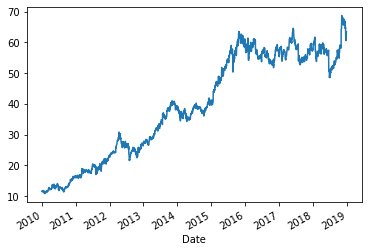

In [ ]:
sbux = df[df['Name'] == 'SBUX']['Close']
sbux.plot()

In [ ]:
train = sbux.iloc[:-Ntest]
test = sbux.iloc[-Ntest:]

In [ ]:
model = pm.auto_arima(train,
                      error_action='ignore', trace=True,
                      supress_warnings=True, maxiter=10,
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3858.919, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3851.895, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3853.862, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3853.860, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3854.154, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3855.861, Time=0.42 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.302 seconds


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1923.948
Date:                Fri, 04 Feb 2022   AIC                           3851.895
Time:                        09:58:26   BIC                           3863.317
Sample:                             0   HQIC                          3856.066
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      0.012      2.048      0.041       0.001       0.049
sigma2         0.3283      0.003     94.371      0.000       0.321       0.335
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             18901.16
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               3.80   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

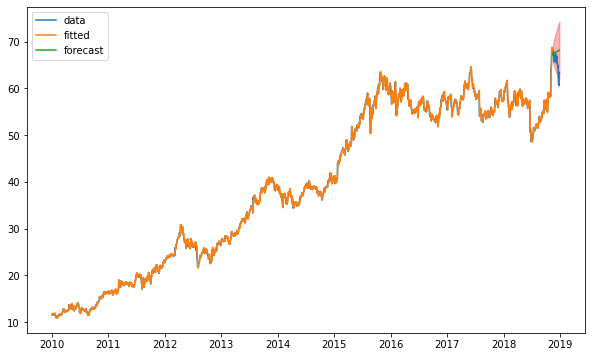

In [ ]:
plot_result(model, sbux, train, test)

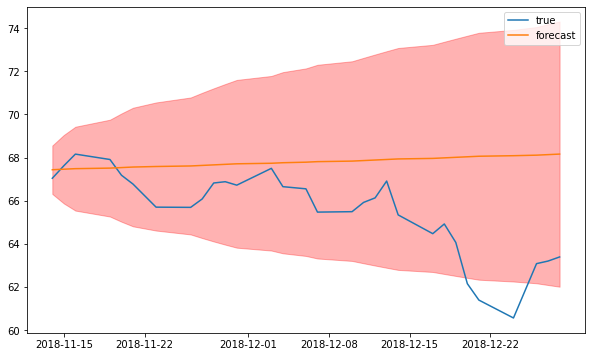

In [ ]:
plot_test(model, test)

In [ ]:
print('RMSE ARIMA:', rmse(model.predict(Ntest), test))
print('RMSE NAIVE:', rmse(train.iloc[-1], test))

RMSE ARIMA: 3.094903479339405
RMSE NAIVE: 2.6889385763409135
